<a href="https://colab.research.google.com/github/chauhandhruvsingh/Natural-Language-Processing-of-Covid-Vaccination-Tweets/blob/main/NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing of Vaccination Tweets


##Installing Libraries

In [ ]:
print("Importing libraries")

Importing libraries


In [ ]:
pip install textblob

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import plotly.express as ex
import datetime
import warnings
warnings.filterwarnings("ignore")
import logging
import scipy.sparse
from gensim import matutils
import pickle
import random

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv(r"vaccination_tweets.csv")

In [ ]:
df.head()

id             user_name              user_location  \
0  1.340540e+18            Rachel Roh  La Crescenta-Montrose, CA   
1  1.338160e+18           Albert Fong          San Francisco, CA   
2  1.337860e+18              eli🇱🇹🇪🇺👌                   Your Bed   
3  1.337860e+18         Charles Adler     Vancouver, BC - Canada   
4  1.337850e+18  Citizen News Channel                        NaN   

                                    user_description      user_created  \
0  Aggregator of Asian American news; scanning di...  08-04-2009 17:52   
1  Marketing dude, tech geek, heavy metal & '80s ...  21-09-2009 15:27   
2                                     heil, hydra 🖐☺  25-06-2020 23:30   
3  Hosting "CharlesAdlerTonight" Global News Radi...  10-09-2008 11:28   
4  Citizen News Channel bringing you an alternati...  23-04-2020 17:58   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

               date                                               text  \
0  20-12-2020 06:06  Same folks said daikon paste could treat a cyt...   
1  13-12-2020 16:27  While the world has been on the wrong side of ...   
2  12-12-2020 20:33  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  12-12-2020 20:23  Facts are immutable, Senator, even when you're...   
4  12-12-2020 20:17  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

##Data Preprocessing

In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
        'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

date                                               text
0  20-12-2020 06:06  Same folks said daikon paste could treat a cyt...
1  13-12-2020 16:27  While the world has been on the wrong side of ...
2  12-12-2020 20:33  #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3  12-12-2020 20:23  Facts are immutable, Senator, even when you're...
4  12-12-2020 20:17  Explain to me again why we need a vaccine @Bor...

In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df.head()

date                                               text
0  20-12-2020 06:06  folks said daikon paste could treat cytokine s...
1  13-12-2020 16:27  world wrong side history year hopefully bigges...
2  12-12-2020 20:33  coronavirus sputnikv astrazeneca pfizerbiontec...
3  12-12-2020 20:23  facts immutable senator even youre ethically s...
4  12-12-2020 20:17  explain need vaccine borisjohnson matthancock ...

In [ ]:
text_df.to_pickle("vaccine.pkl")

##Exploratory Data Analysis

### 1.Analysis of Frequency and routine of words in tweets


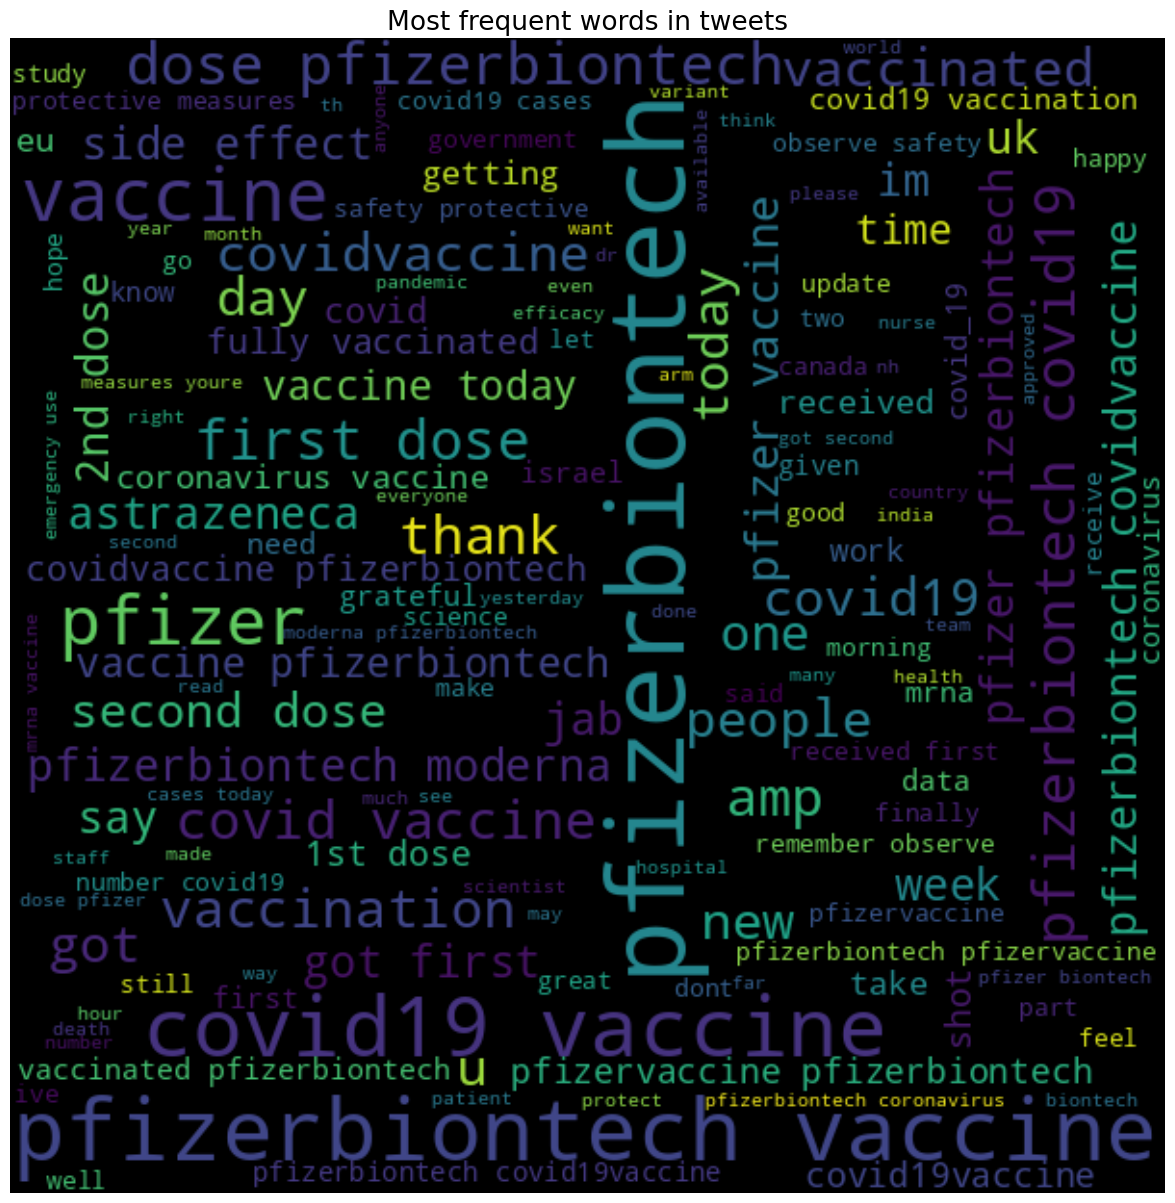

In [ ]:
text = ' '.join([word for word in text_df['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=150, width=600, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in tweets', fontsize=19)
plt.show()

####Find most common word and read it in the document term matrix


In [ ]:


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(text_df['text'])
feature_names = vectorizer.get_feature_names_out()
dtm_df = pd.DataFrame(dtm.toarray(), columns=feature_names)
most_common_word = dtm_df.sum().idxmax()
print("Most common word:", most_common_word)

print("\nDocument-Term Matrix:")
print(dtm_df)



Most common word: pfizerbiontech

Document-Term Matrix:
       000  0000001  0011  004  01  01aug2021  02  02012021  024  03  ...  \
0        0        0     0    0   0          0   0         0    0   0  ...   
1        0        0     0    0   0          0   0         0    0   0  ...   
2        0        0     0    0   0          0   0         0    0   0  ...   
3        0        0     0    0   0          0   0         0    0   0  ...   
4        0        0     0    0   0          0   0         0    0   0  ...   
...    ...      ...   ...  ...  ..        ...  ..       ...  ...  ..  ...   
11015    0        0     0    0   0          0   0         0    0   0  ...   
11016    0        0     0    0   0          0   0         0    0   0  ...   
11017    0        0     0    0   0          0   0         0    0   0  ...   
11018    0        0     0    0   0          0   0         0    0   0  ...   
11019    0        0     0    0   0          0   0         0    0   0  ...   

       परतनध  สค  อ

####Find and print top 30 words used in the tweets


In [ ]:
text_df = pd.read_pickle("vaccine.pkl")
text = ' '.join([word for word in text_df['text']])
words = text.split()
top_30_words = pd.Series(' '.join(words).split()).value_counts()[:30]
print(top_30_words)

pfizerbiontech    6347
vaccine           4302
covid19           2446
pfizer            1614
dose              1498
first             1193
today              838
got                796
vaccines           783
vaccinated         764
covid              723
covidvaccine       717
vaccination        603
second             568
get                559
doses              491
amp                476
moderna            473
pfizervaccine      465
shot               443
coronavirus        443
people             437
2nd                432
received           401
one                380
done               377
2                  367
thank              352
astrazeneca        342
us                 338
Name: count, dtype: int64


####Add new stop words


In [ ]:
new_stop_words = {'dose', 'got', 'get', 'amp', '2nd', 'one', '2', 'us'}
stop_words = set(stopwords.words('english')) | new_stop_words


####Clearing the newly added stopwords and generating a new word cloud

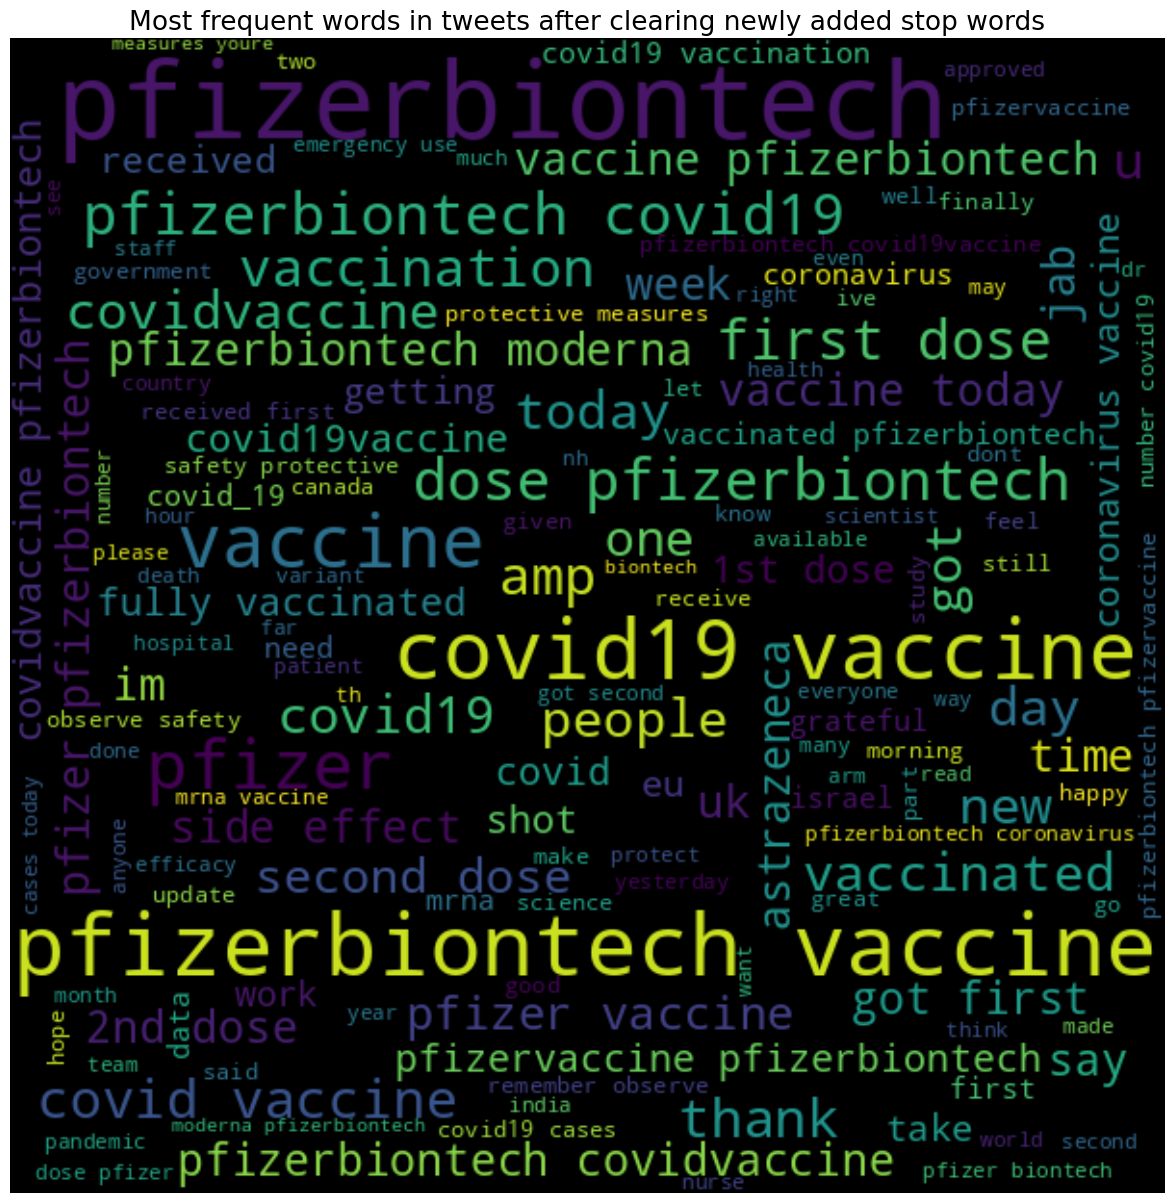

In [ ]:
# Clear the newly added stop words
text = ' '.join([word for word in text_df['text']])

stop_words.discard('dose')
stop_words.discard('got')
stop_words.discard('get')
stop_words.discard('amp')
stop_words.discard('2nd')
stop_words.discard('one')
stop_words.discard('2')
stop_words.discard('us')

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=150, width=600, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in tweets after clearing newly added stop words', fontsize=19)
plt.show()

####Identify the top words and the routine in which they occur in tweets

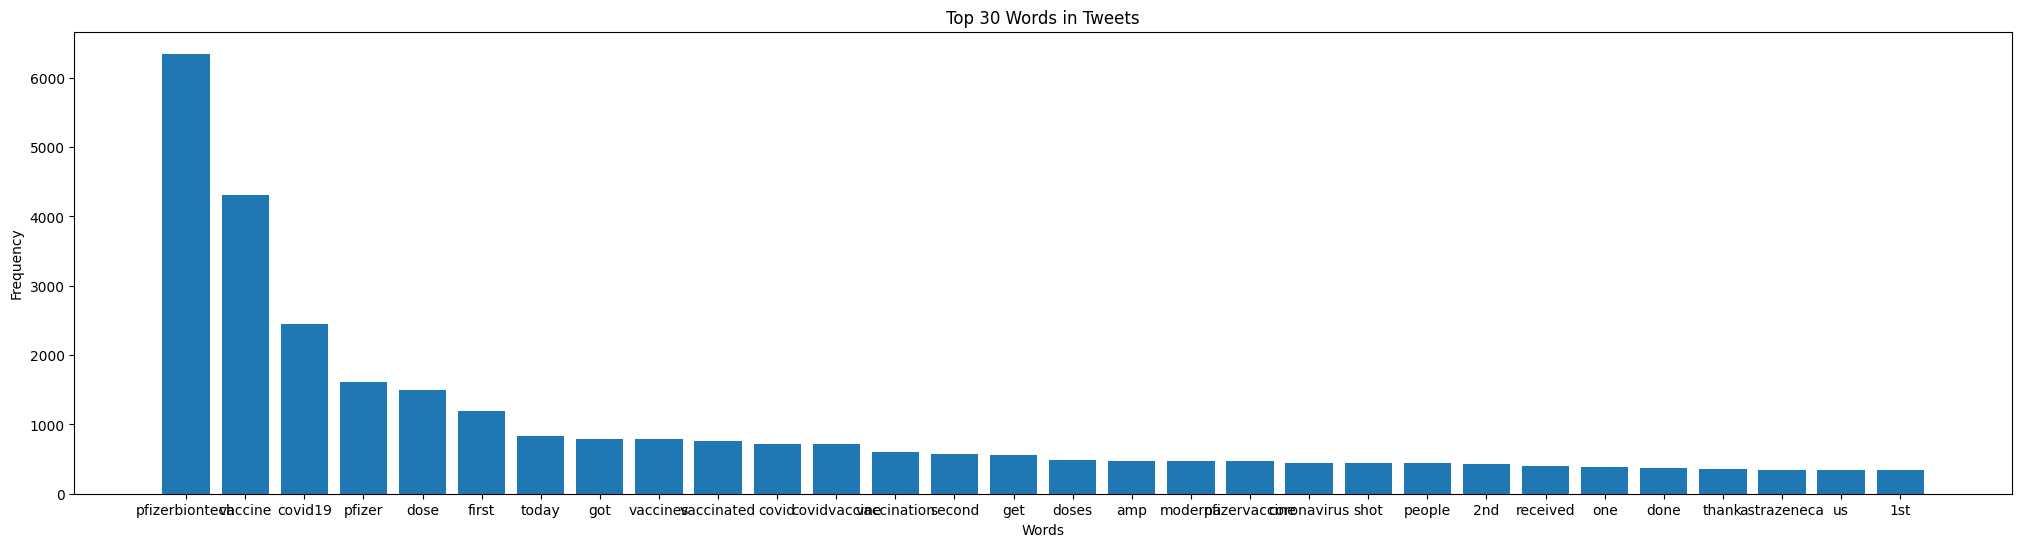

In [ ]:
import matplotlib.pyplot as plt

top_n = 30
top_df = dtm_df.sum().sort_values(ascending=False)[:top_n]
top_words = list(top_df.index)
top_counts = list(top_df.values)

plt.figure(figsize=(25, 6))
plt.bar(top_words, top_counts)
plt.title("Top 30 Words in Tweets")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

###2.Time Series Analysis

In [ ]:

ft_data = df.copy()
ft_data['date'] = pd.to_datetime(df['date']).dt.date
ft_data['year'] = pd.DatetimeIndex(ft_data['date']).year
b_date_count = ft_data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')

fig.add_annotation(x=datetime.datetime(2021,3,1), y=b_date_count_dt.loc[pd.Timestamp('2021-03-1'),'year'],
            text=r"J&J authorization",
            showarrow=True,
            arrowhead= 3,
            bordercolor="#c7c7c7")


fig.update_layout(title='<b>Daily Tweets<b>',width=1000)
fig.show()

##Sentiment Analysis

###Calculating the polarity of tweets

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

text_df['polarity'] = text_df['text'].apply(polarity)

text_df.head(10)

date                                               text  \
0  20-12-2020 06:06  folks said daikon paste could treat cytokine s...   
1  13-12-2020 16:27  world wrong side history year hopefully bigges...   
2  12-12-2020 20:33  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  12-12-2020 20:23  facts immutable senator even youre ethically s...   
4  12-12-2020 20:17  explain need vaccine borisjohnson matthancock ...   
5  12-12-2020 20:11  anyone useful adviceguidance whether covid vac...   
6  12-12-2020 20:06  bit sad claim fame success vaccination patriot...   
7  12-12-2020 20:04  many bright days 2020 best 1 bidenharris winni...   
8  12-12-2020 20:01  covid vaccine getting covidvaccine covid19 pfi...   
9  12-12-2020 19:30  covidvaccine states start getting covid19vacci...   

   polarity  
0     0.000  
1    -0.500  
2     0.000  
3     0.100  
4     0.000  
5     0.400  
6    -0.100  
7     0.675  
8     0.000  
9     0.000

###Classification tweets in positve ,negative and neutral

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

text_df['sentiment'] = text_df['polarity'].apply(sentiment)

text_df.head()

date                                               text  \
0  20-12-2020 06:06  folks said daikon paste could treat cytokine s...   
1  13-12-2020 16:27  world wrong side history year hopefully bigges...   
2  12-12-2020 20:33  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  12-12-2020 20:23  facts immutable senator even youre ethically s...   
4  12-12-2020 20:17  explain need vaccine borisjohnson matthancock ...   

   polarity sentiment  
0       0.0   Neutral  
1      -0.5  Negative  
2       0.0   Neutral  
3       0.1  Positive  
4       0.0   Neutral

###Subjectivity of Tweets

In [ ]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

text_df['subjectivity'] = text_df['text'].apply(get_subjectivity)

print(text_df[['text', 'subjectivity']].head())


                                                text  subjectivity
0  folks said daikon paste could treat cytokine s...      0.000000
1  world wrong side history year hopefully bigges...      0.900000
2  coronavirus sputnikv astrazeneca pfizerbiontec...      0.033333
3  facts immutable senator even youre ethically s...      0.550000
4  explain need vaccine borisjohnson matthancock ...      0.000000


<Axes: xlabel='sentiment', ylabel='count'>

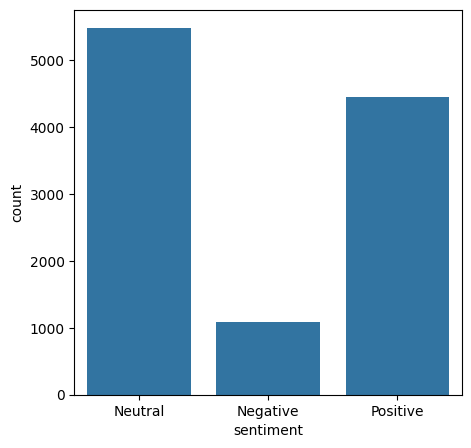

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)


Text(0.5, 1.0, 'Distribution of sentiments')

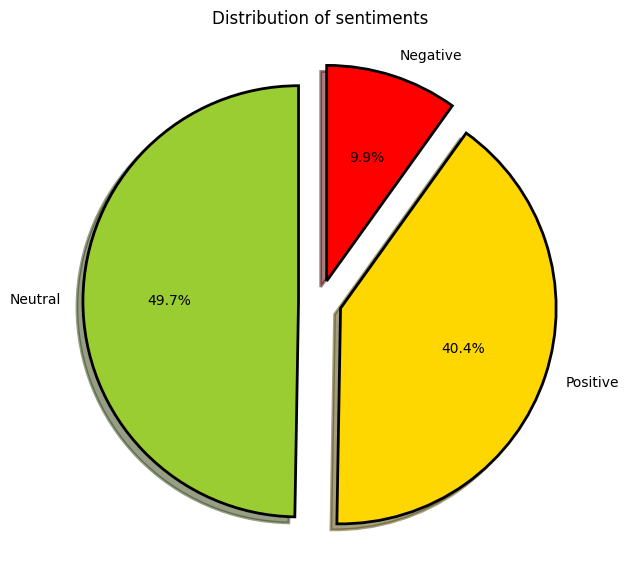

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

###Data visualisation of positive tweets

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

date                                               text  \
9216  19-07-2021 06:15  despite israel pfizerbiontech vaccine consider...   
7859  11-04-2021 18:36  excellent news israel pfizerbiontech pfizervac...   
2308  05-01-2021 18:59  thankful get covid vaccine today impressed org...   
5534  21-02-2021 03:03  syappa mukka done dusted best thing happened m...   
8719  23-06-2021 06:50  got vaccine todayy hooray gods timing always p...   

      polarity sentiment  subjectivity  
9216       1.0  Positive           0.3  
7859       1.0  Positive           1.0  
2308       1.0  Positive           1.0  
5534       1.0  Positive           0.3  
8719       1.0  Positive           1.0

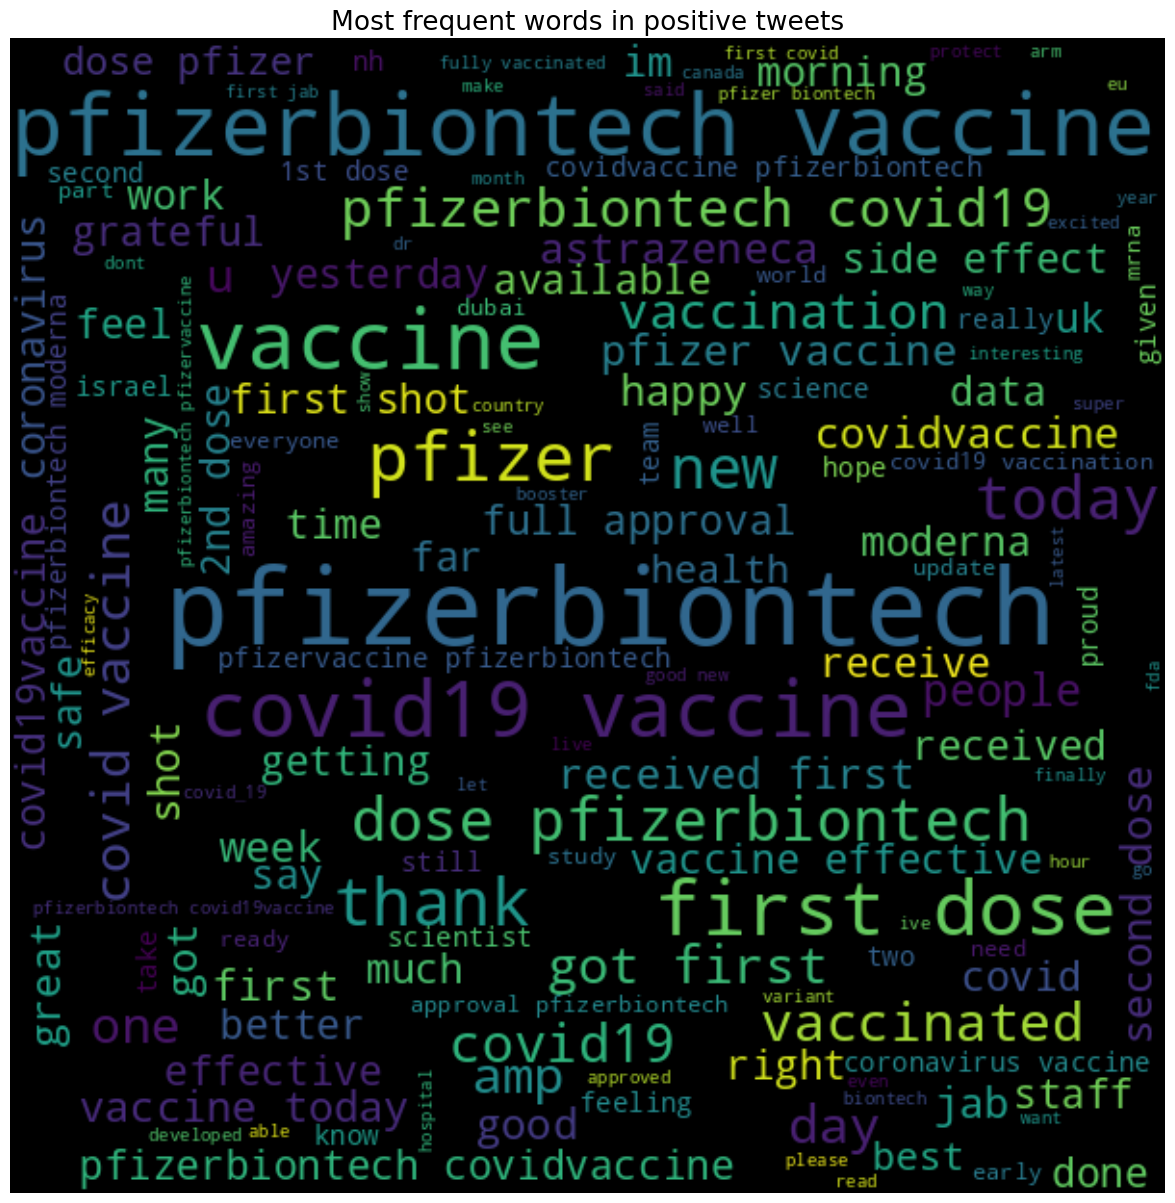

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=150, width=600, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

###Data visualisation of negative tweets

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

date                                               text  \
2912  08-01-2021 21:02  work skilled nursing facility got first vaccin...   
7256  23-03-2021 12:06  200321 752308 vaccinations new daily record da...   
2073  01-01-2021 12:37  ukgovernment cant even vaccinate properly ethi...   
7715  06-04-2021 10:16  got first dose less waiting time airport vacci...   
7157  23-03-2021 00:48  nas_k27 second dose due end next month well fa...   

      polarity sentiment  subjectivity  
2912 -0.003333  Negative      0.560000  
7256 -0.003409  Negative      0.213636  
2073 -0.004762  Negative      0.678571  
7715 -0.005556  Negative      0.166667  
7157 -0.006250  Negative      0.343750

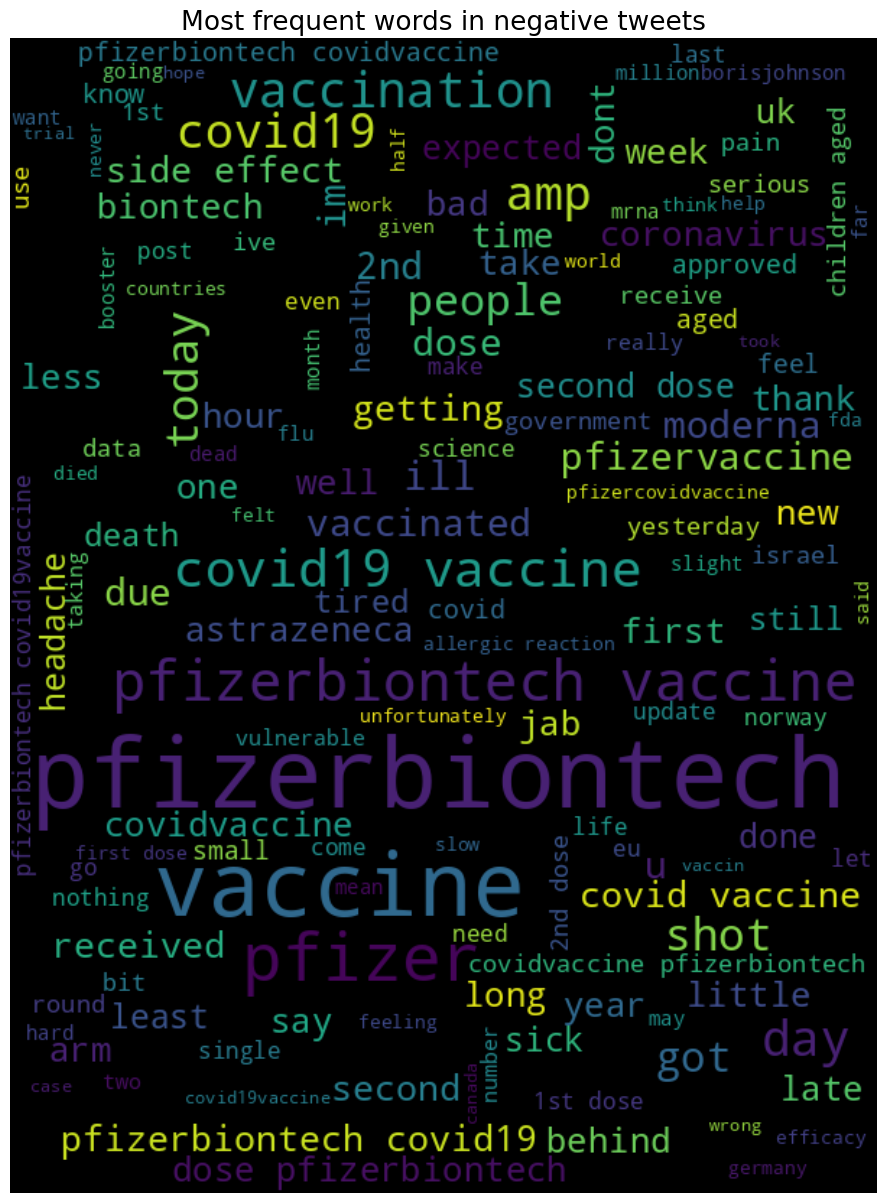

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=150, width=600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

###Data visualisation of neutral tweets

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

date                                               text  \
0     20-12-2020 06:06  folks said daikon paste could treat cytokine s...   
7539  30-03-2021 14:45  additional measures discussions potential part...   
7558  04-04-2021 11:46  2nd booster shot pfizerbiontech choosetovaccin...   
7557  04-04-2021 12:58         2nd dose pfizerbiontech covid19vaccination   
7555  04-04-2021 19:06  callmejulius got mine two weeks ago pfizerbion...   

      polarity sentiment  subjectivity  
0          0.0   Neutral           0.0  
7539       0.0   Neutral           1.0  
7558       0.0   Neutral           0.0  
7557       0.0   Neutral           0.0  
7555       0.0   Neutral           0.0

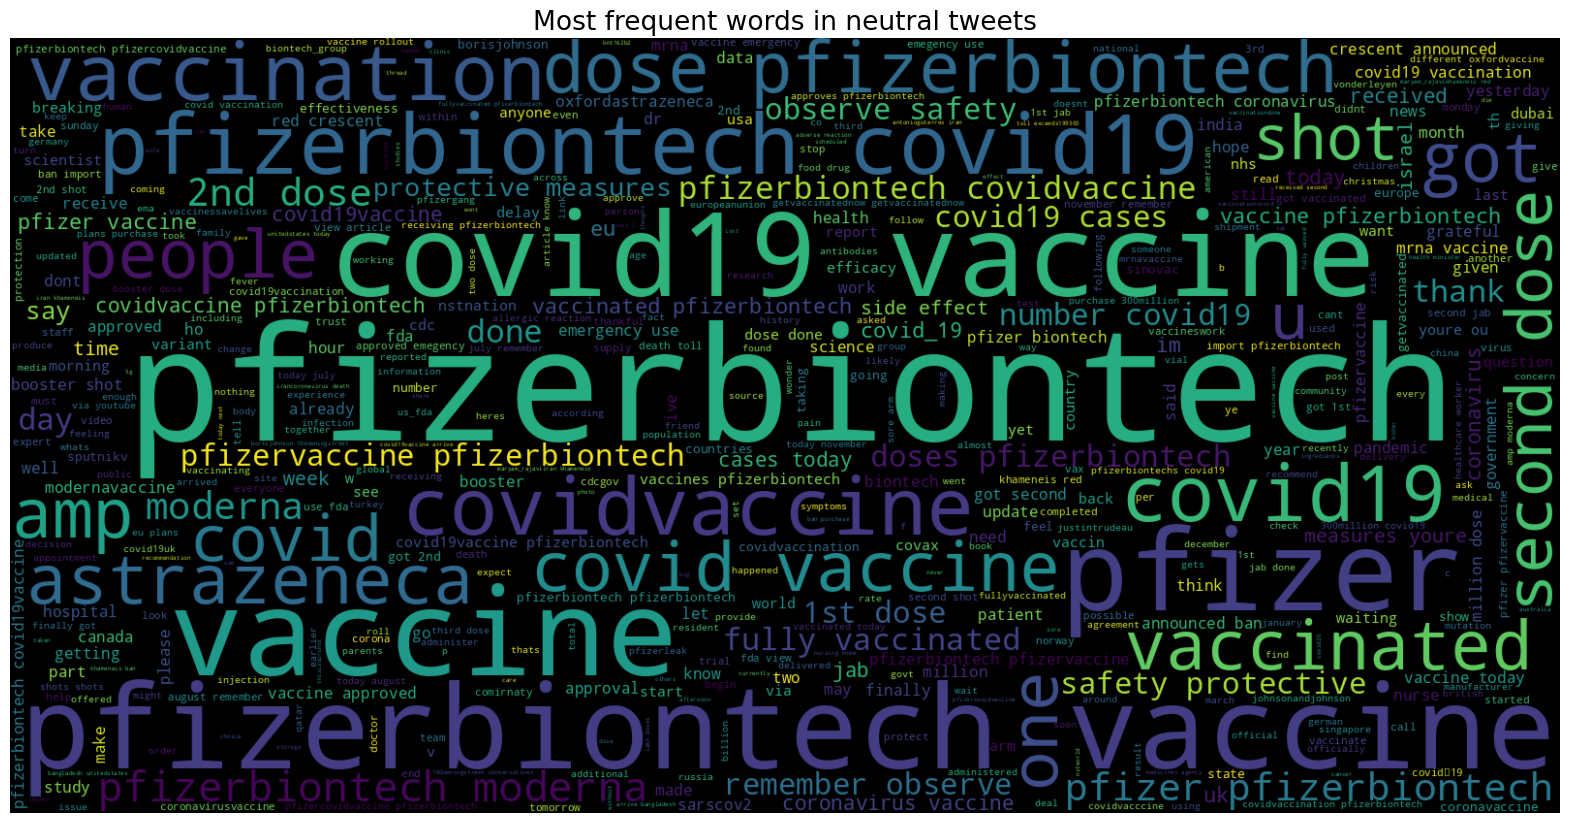

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

###Sentiments of Tweets over time

<Figure size 1200x600 with 0 Axes>

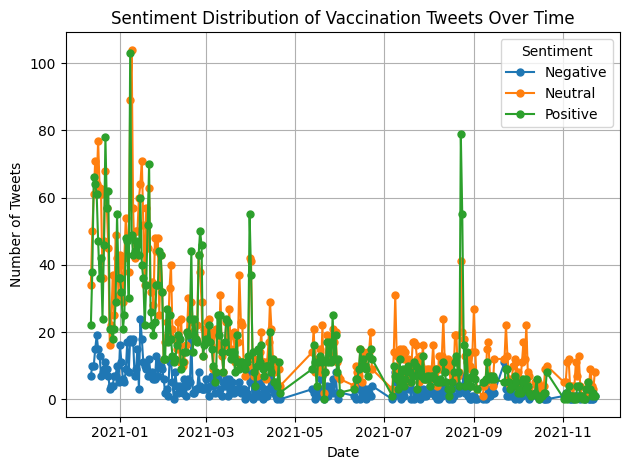

In [ ]:
# Convert 'date' column to datetime format
text_df['date'] = pd.to_datetime(df['date'])

# Group data by date and sentiment category
sentiment_over_time = text_df.groupby([text_df['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment distribution over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o', markersize=5)
plt.title('Sentiment Distribution of Vaccination Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


##Topic Modeling

### Topic Modeling - Attempt #1 (All Text)

In [ ]:
from gensim import matutils, models
import scipy.sparse


In [ ]:
tdm= dtm_df.transpose()
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
term_locations = {}

for term_index, term in enumerate(tdm.columns):

    non_zero_indices = tdm[term].to_numpy().nonzero()[0]
    term_locations[term] = non_zero_indices.tolist()

print(term_locations)
with open('term_locations.pkl', 'wb') as f:
    pickle.dump(term_locations, f)

{0: [3831, 4181, 4197, 6115, 11059, 11271, 13043, 14213, 15208], 1: [2344, 5166, 5550, 7164, 7250, 13613, 15787, 16376, 16538, 16582, 16640], 2: [390, 1834, 3786, 3931, 4036, 8614, 9750, 11271, 12977, 14025, 15808, 16643], 3: [1026, 2554, 5365, 5489, 5558, 5765, 7565, 13368, 14284, 16693], 4: [2550, 5694, 9335, 10158, 11271, 15808, 16394], 5: [1152, 1601, 2633, 3881, 13020, 15705, 15808, 16398, 16403], 6: [2407, 2864, 3307, 3553, 5800, 11087, 13011, 14307, 15454, 15688, 15787], 7: [327, 2279, 2332, 2663, 4291, 5205, 9202, 16460], 8: [3881, 3883, 3983, 6477, 9750, 11271, 15808], 9: [3919, 3983, 6477, 6548, 7003, 9804, 10551, 10953, 13157, 14080, 14093, 15685], 10: [481, 3371, 4328, 6030, 9241, 9631, 11180, 11271, 15808, 16194], 11: [2132, 2279, 3403, 3773, 3883, 3983, 10558, 11271, 15685, 15808, 16473], 12: [1208, 1384, 2932, 7000, 7746, 9631, 10220, 11079, 12010, 12527, 13528, 15685], 13: [1784, 7003, 11271, 12010, 13027, 16500], 14: [191, 588, 1033, 1548, 5664, 9804, 10622, 12375, 130

In [ ]:
with open("term_locations.pkl", "rb") as f:
    term_locations = pickle.load(f)

id2word = {index: term for term, indices in term_locations.items() for index in indices}


In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.018*"11019" + 0.017*"11018" + 0.011*"11012" + 0.010*"11007" + 0.008*"11019" + 0.008*"11001" + 0.007*"11019" + 0.006*"11019" + 0.006*"11019" + 0.006*"11019"'),
 (1,
  '0.072*"11018" + 0.042*"11012" + 0.021*"11019" + 0.019*"11016" + 0.016*"11007" + 0.013*"11016" + 0.012*"11008" + 0.011*"11006" + 0.009*"11019" + 0.008*"10979"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.021*"11018" + 0.015*"11019" + 0.013*"11007" + 0.012*"11019" + 0.010*"11019" + 0.010*"11019" + 0.010*"11019" + 0.010*"11019" + 0.009*"11012" + 0.009*"11019"'),
 (1,
  '0.080*"11018" + 0.044*"11012" + 0.026*"11016" + 0.024*"11019" + 0.018*"11016" + 0.018*"11007" + 0.015*"11006" + 0.014*"11008" + 0.011*"11019" + 0.010*"10844"'),
 (2,
  '0.034*"11018" + 0.028*"11012" + 0.018*"11019" + 0.009*"11007" + 0.009*"11001" + 0.008*"10986" + 0.007*"10909" + 0.006*"10804" + 0.006*"10964" + 0.006*"10996"')]

### Topic Modeling - Attempt #2 (Nouns Only)

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('vaccine.pkl')
data_clean

date                                               text
0      20-12-2020 06:06  folks said daikon paste could treat cytokine s...
1      13-12-2020 16:27  world wrong side history year hopefully bigges...
2      12-12-2020 20:33  coronavirus sputnikv astrazeneca pfizerbiontec...
3      12-12-2020 20:23  facts immutable senator even youre ethically s...
4      12-12-2020 20:17  explain need vaccine borisjohnson matthancock ...
...                 ...                                                ...
11015  17-11-2021 11:27  number covid19 cases today 17 november 2021 re...
11016  17-11-2021 03:17                          first dose pfizerbiontech
11017  16-11-2021 12:14  number covid19 cases today 16 november 2021 re...
11018  15-11-2021 20:29  pfizerbiontech developed new pill paxlovid inc...
11019  15-11-2021 11:28  number covid19 cases today 15 november 2021 re...

[11020 rows x 2 columns]

In [ ]:
data_nouns = pd.DataFrame(data_clean.text.apply(nouns))
data_nouns

text
0                       folks paste storm pfizerbiontech
1          world side history year vaccination effort ev
2      coronavirus sputnikv astrazeneca pfizerbiontec...
3                                     facts senator born
4      vaccine borisjohnson matthancock whereareallth...
...                                                  ...
11015  number covid19 cases today november remember o...
11016                                     pfizerbiontech
11017  number covid19 cases today november remember o...
11018  pfizerbiontech pill paxlovid change survive co...
11019  number covid19 cases today november remember o...

[11020 rows x 1 columns]

In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['dose', 'got', 'get', 'amp', '2nd', 'one', '2', 'us']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

stop_words = list(stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

13billions  15yearolds  __ice9  _b_meyer  _dchealth  _diabetes101  \
0               0           0       0         0          0             0   
1               0           0       0         0          0             0   
2               0           0       0         0          0             0   
3               0           0       0         0          0             0   
4               0           0       0         0          0             0   
...           ...         ...     ...       ...        ...           ...   
11015           0           0       0         0          0             0   
11016           0           0       0         0          0             0   
11017           0           0       0         0          0             0   
11018           0           0       0         0          0             0   
11019           0           0       0         0          0             0   

       _emmalou84  _jessicadavies  _miguelhernan  _scgp_  ...  فايزر  كورونا  \
0               0               0              0       0  ...      0       0   
1               0               0              0       0  ...      0       0   
2               0               0              0       0  ...      0       0   
3               0               0              0       0  ...      0       0   
4               0               0              0       0  ...      0       0   
...           ...             ...            ...     ...  ...    ...     ...   
11015           0               0              0       0  ...      0       0   
11016           0               0              0       0  ...      0       0   
11017           0               0              0       0  ...      0       0   
11018           0               0              0       0  ...      0       0   
11019           0               0              0       0  ...      0       0   

       واکسن_بخرید  وتفيزرنا  जन  परतनध  ᴄᴏᴠɪᴅᴠᴀᴄᴄɪɴᴀᴛɪᴏɴ  ᴠᴀᴄᴄɪɴᴇssᴀᴠᴇʟɪᴠᴇs  \
0                0         0   0      0                 0                  0   
1                0         0   0      0                 0                  0   
2                0         0   0      0                 0                  0   
3                0         0   0      0                 0                  0   
4                0         0   0      0                 0                  0   
...            ...       ...  ..    ...               ...                ...   
11015            0         0   0      0                 0                  0   
11016            0         0   0      0                 0                  0   
11017            0         0   0      0                 0                  0   
11018            0         0   0      0                 0                  0   
11019            0         0   0      0                 0                  0   

       ᴠᴀᴄᴄɪɴᴇᴅᴀʏ  𝖳𝖧𝖠𝖨𝖫𝖠𝖭𝖣  
0               0         0  
1               0         0  
2               0         0  
3               0         0  
4               0         0  
...           ...       ...  
11015           0         0  
11016           0         0  
11017           0         0  
11018           0         0  
11019           0         0  

[11020 rows x 10463 columns]

In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.111*"pfizerbiontech" + 0.083*"vaccine" + 0.037*"pfizer" + 0.036*"covid19" + 0.012*"vaccines" + 0.009*"covid" + 0.009*"shot" + 0.009*"pfizervaccine" + 0.009*"covidvaccine" + 0.008*"moderna"'),
 (1,
  '0.025*"today" + 0.022*"vaccination" + 0.018*"doses" + 0.018*"covid19" + 0.012*"cases" + 0.011*"number" + 0.011*"safety" + 0.009*"measures" + 0.009*"observe" + 0.009*"remember"')]

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.046*"vaccine" + 0.031*"today" + 0.025*"doses" + 0.013*"vaccination" + 0.011*"covid19" + 0.009*"thanks" + 0.009*"use" + 0.008*"people" + 0.007*"vaccines" + 0.006*"emergency"'),
 (1,
  '0.144*"pfizerbiontech" + 0.070*"vaccine" + 0.047*"pfizer" + 0.040*"covid19" + 0.019*"vaccines" + 0.013*"covidvaccine" + 0.012*"pfizervaccine" + 0.011*"covid" + 0.011*"moderna" + 0.010*"booster"'),
 (2,
  '0.029*"covid19" + 0.023*"shot" + 0.022*"vaccine" + 0.021*"today" + 0.018*"cases" + 0.017*"number" + 0.017*"safety" + 0.014*"measures" + 0.014*"observe" + 0.014*"remember"')]

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.120*"pfizerbiontech" + 0.046*"vaccine" + 0.032*"covidvaccine" + 0.016*"pfizer" + 0.015*"today" + 0.012*"covid19" + 0.012*"pfizervaccine" + 0.011*"time" + 0.008*"jab" + 0.006*"year"'),
 (1,
  '0.051*"pfizer" + 0.046*"pfizerbiontech" + 0.043*"covid19" + 0.041*"vaccine" + 0.022*"today" + 0.018*"cases" + 0.016*"number" + 0.016*"safety" + 0.013*"measures" + 0.013*"observe"'),
 (2,
  '0.074*"vaccine" + 0.052*"pfizerbiontech" + 0.029*"covid19" + 0.027*"doses" + 0.024*"vaccines" + 0.020*"moderna" + 0.018*"people" + 0.012*"pfizer" + 0.011*"children" + 0.011*"approval"'),
 (3,
  '0.070*"pfizerbiontech" + 0.045*"vaccine" + 0.030*"covid19" + 0.030*"vaccination" + 0.022*"shot" + 0.019*"booster" + 0.013*"study" + 0.012*"today" + 0.011*"thank" + 0.010*"pfizer"')]

### Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text.apply(nouns_adj))
data_nouns_adj

text
0       folks daikon paste cytokine storm pfizerbiontech
1      world wrong side history year biggest vaccinat...
2      coronavirus sputnikv astrazeneca pfizerbiontec...
3                    facts immutable senator sturdy born
4      need vaccine borisjohnson matthancock whereare...
...                                                  ...
11015  number covid19 cases today november remember o...
11016                                dose pfizerbiontech
11017  number covid19 cases today november remember o...
11018  pfizerbiontech new pill paxlovid change surviv...
11019  number covid19 cases today november remember o...

[11020 rows x 1 columns]

In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

13billions  15yearolds  1st  __ice9  _b_meyer  _dchealth  _diabetes101  \
0               0           0    0       0         0          0             0   
1               0           0    0       0         0          0             0   
2               0           0    0       0         0          0             0   
3               0           0    0       0         0          0             0   
4               0           0    0       0         0          0             0   
...           ...         ...  ...     ...       ...        ...           ...   
11015           0           0    0       0         0          0             0   
11016           0           0    0       0         0          0             0   
11017           0           0    0       0         0          0             0   
11018           0           0    0       0         0          0             0   
11019           0           0    0       0         0          0             0   

       _emmalou84  _jessicadavies  _miguelhernan  ...  واکسن_بخرید  وتفيزرنا  \
0               0               0              0  ...            0         0   
1               0               0              0  ...            0         0   
2               0               0              0  ...            0         0   
3               0               0              0  ...            0         0   
4               0               0              0  ...            0         0   
...           ...             ...            ...  ...          ...       ...   
11015           0               0              0  ...            0         0   
11016           0               0              0  ...            0         0   
11017           0               0              0  ...            0         0   
11018           0               0              0  ...            0         0   
11019           0               0              0  ...            0         0   

       जन  परतनध  สค  ไฟเซอรไดรบอนมตผานเฟส4  ᴄᴏᴠɪᴅᴠᴀᴄᴄɪɴᴀᴛɪᴏɴ  \
0       0      0   0                      0                 0   
1       0      0   0                      0                 0   
2       0      0   0                      0                 0   
3       0      0   0                      0                 0   
4       0      0   0                      0                 0   
...    ..    ...  ..                    ...               ...   
11015   0      0   0                      0                 0   
11016   0      0   0                      0                 0   
11017   0      0   0                      0                 0   
11018   0      0   0                      0                 0   
11019   0      0   0                      0                 0   

       ᴠᴀᴄᴄɪɴᴇssᴀᴠᴇʟɪᴠᴇs  ᴠᴀᴄᴄɪɴᴇᴅᴀʏ  𝖳𝖧𝖠𝖨𝖫𝖠𝖭𝖣  
0                      0           0         0  
1                      0           0         0  
2                      0           0         0  
3                      0           0         0  
4                      0           0         0  
...                  ...         ...       ...  
11015                  0           0         0  
11016                  0           0         0  
11017                  0           0         0  
11018                  0           0         0  
11019                  0           0         0  

[11020 rows x 12795 columns]

In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.073*"pfizerbiontech" + 0.072*"vaccine" + 0.032*"covid19" + 0.017*"pfizer" + 0.012*"covid" + 0.011*"today" + 0.011*"vaccination" + 0.010*"second" + 0.009*"shot" + 0.008*"doses"'),
 (1,
  '0.064*"pfizerbiontech" + 0.022*"pfizer" + 0.021*"covid19" + 0.016*"covidvaccine" + 0.013*"vaccines" + 0.012*"pfizervaccine" + 0.012*"moderna" + 0.010*"today" + 0.009*"cases" + 0.008*"number"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.030*"pfizerbiontech" + 0.025*"vaccine" + 0.025*"covid19" + 0.014*"cases" + 0.013*"today" + 0.012*"number" + 0.012*"safety" + 0.011*"protective" + 0.011*"measures" + 0.010*"observe"'),
 (1,
  '0.074*"pfizerbiontech" + 0.063*"vaccine" + 0.041*"covid19" + 0.035*"pfizer" + 0.017*"vaccines" + 0.013*"doses" + 0.011*"moderna" + 0.011*"fda" + 0.009*"covid" + 0.009*"approval"'),
 (2,
  '0.095*"pfizerbiontech" + 0.035*"vaccine" + 0.023*"today" + 0.019*"second" + 0.016*"shot" + 0.015*"covidvaccine" + 0.013*"booster" + 0.012*"pfizer" + 0.011*"vaccination" + 0.011*"covid19"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.028*"pfizerbiontech" + 0.013*"vaccine" + 0.012*"thank" + 0.009*"today" + 0.008*"new" + 0.008*"vaccination" + 0.006*"staff" + 0.006*"im" + 0.006*"thanks" + 0.005*"news"'),
 (1,
  '0.054*"pfizerbiontech" + 0.028*"vaccine" + 0.025*"covid19" + 0.019*"booster" + 0.015*"vaccines" + 0.013*"health" + 0.008*"doses" + 0.008*"israel" + 0.008*"moderna" + 0.006*"people"'),
 (2,
  '0.105*"pfizerbiontech" + 0.080*"vaccine" + 0.041*"pfizer" + 0.040*"covid19" + 0.015*"covid" + 0.014*"second" + 0.013*"today" + 0.011*"pfizervaccine" + 0.011*"shot" + 0.011*"covidvaccine"'),
 (3,
  '0.032*"pfizerbiontech" + 0.025*"covid19" + 0.022*"cases" + 0.020*"today" + 0.020*"number" + 0.020*"safety" + 0.017*"protective" + 0.017*"measures" + 0.016*"observe" + 0.016*"remember"')]

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.047*"pfizerbiontech" + 0.040*"vaccine" + 0.035*"covid19" + 0.030*"vaccines" + 0.020*"doses" + 0.013*"moderna" + 0.012*"today" + 0.012*"cases" + 0.010*"number" + 0.010*"safety"'),
 (1,
  '0.052*"pfizerbiontech" + 0.031*"vaccine" + 0.024*"vaccination" + 0.017*"covid19" + 0.017*"today" + 0.008*"israel" + 0.007*"thank" + 0.007*"thanks" + 0.007*"health" + 0.006*"jab"'),
 (2,
  '0.103*"pfizerbiontech" + 0.077*"vaccine" + 0.041*"pfizer" + 0.038*"covid19" + 0.019*"covid" + 0.018*"covidvaccine" + 0.014*"second" + 0.013*"pfizervaccine" + 0.011*"shot" + 0.010*"today"'),
 (3,
  '0.037*"pfizerbiontech" + 0.019*"booster" + 0.015*"study" + 0.008*"vaccines" + 0.006*"shot" + 0.006*"time" + 0.005*"single" + 0.004*"jabs" + 0.004*"deaths" + 0.004*"people"')]

##Text Generation


###Building Markov Chain Function

In [ ]:
def create_markov_chain(corpus):
    """Create a Markov chain from a given corpus."""
    transitions = {}
    for i in range(len(corpus) - 1):
        key = corpus[i]
        value = corpus[i+1]
        if key not in transitions:
            transitions[key] = []
        transitions[key].append(value)
    return transitions

###Text Generator using the Markov chain function

In [ ]:
def generate_text(transitions, start_text, num_words):
    """Generate text using a Markov chain."""
    chain = [start_text]
    for i in range(num_words - 1):
        last_word = chain[-1]
        if last_word in transitions:
            next_word = random.choice(transitions[last_word])
            chain.append(next_word)
        else:
            print(f"Warning: word '{last_word}' not found in transitions")
            break
    return ' '.join(chain)

###Read the data, create the Markov chain, and generate text

In [ ]:
# Read the contents of the text column from the dataframe
tweets = [tweet.lower() for tweet in text_df['text']]

# Create a corpus of words from the tweets
corpus = [word for tweet in tweets for word in tweet.split()]

# Create a Markov chain from the corpus
transitions = create_markov_chain(corpus)

# Select a random starting word and generate text
start_text = random.choice(list(transitions.keys()))
generated_text = generate_text(transitions, start_text, 20)
print(generated_text)

disinformation undermines confidence pfizerbiontech politicians first dose covid19 vaccine star got 1st jabs administered residents nationwide tv interview 103fm radio
